## imports

In [54]:
import numpy as np
import matplotlib.pyplot as plt

## Proportional hazard function 

In [57]:
#Baseline
def h0(t):
    # h0 constant : 
    h0 = 3 
    return h0

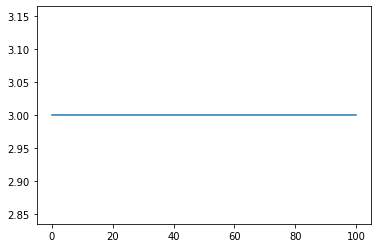

In [58]:
T = np.linspace(0, 100, 100)
y = [h0(t) for t in T]
plt.plot(t,y)

In [59]:
#Hazard rate function
@np.vectorize
def h(t,x,beta):
    h = h0(t)*np.exp(np.dot(x, beta))
    return h

In [60]:
#Definition of beta 
beta = 1

## Affichage d'exemples 

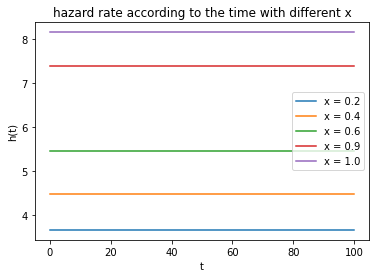

In [64]:
X = np.array([0.2, 0.4, 0.6, 0.9, 1])
T = np.linspace(0, 100, 100)
for x in X : 
    y = [h(t,x,beta) for t in T]
    plt.plot(T,y, label = 'x = '+str(x))
plt.legend()
plt.xlabel('t')
plt.ylabel('h(t)')
plt.title('hazard rate according to the time with different x')
plt.show()

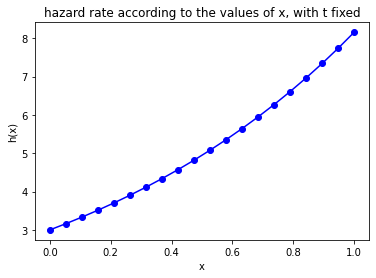

In [65]:
X = np.linspace(0, 1, 20)
t = 0
y = [h(t, x, beta) for x in X]
plt.plot(X,y, '-bo')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.title('hazard rate according to the values of x, with t fixed')
plt.show()

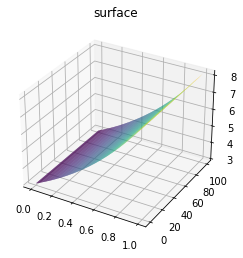

In [66]:
Xs = np.linspace(0, 1, 20)
Ts = np.linspace(0, 100, 100)
X, T = np.meshgrid(Xs, Ts)
h = h(T, X, beta)
ax = plt.axes(projection='3d')
ax.plot_surface(X, T, h, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');